# Regressao Linear - Açudes da Paraíba
## Boqueirão - Com Recarga do Rio São Francisco (Abril/2017)
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531

### Acude de Boqueirão com Recarga do Rio São Francisco - 09/04/2017 ate 08/04/2018

In [1]:
import pandas as pd

In [2]:
# leitura do dataset
#
# Acude de Boqueirão com Recarga do Rio São Francisco - 09/04/2017 ate 08/04/2018
df = pd.read_excel(open("boqueirao20172018.xlsx",'rb'))
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,Epitácio Pessoa,09/04/2017,3.03,12475341.58,-58974.26
1,Epitácio Pessoa,10/04/2017,3.02,12445854.45,-29487.13
2,Epitácio Pessoa,11/04/2017,3.01,12386880.19,-58974.26
3,Epitácio Pessoa,12/04/2017,2.99,12298418.80,-88461.39
4,Epitácio Pessoa,13/04/2017,2.97,12239444.54,-58974.26


In [3]:
#del df["Açude"]
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,Epitácio Pessoa,09/04/2017,3.03,12475341.58,-58974.26
1,Epitácio Pessoa,10/04/2017,3.02,12445854.45,-29487.13
2,Epitácio Pessoa,11/04/2017,3.01,12386880.19,-58974.26
3,Epitácio Pessoa,12/04/2017,2.99,12298418.80,-88461.39
4,Epitácio Pessoa,13/04/2017,2.97,12239444.54,-58974.26


In [4]:
df.tail()

,Açude,Data do registro,Volume (%),Volume (m³),Aporte (m²)
359,Epitácio Pessoa,04/04/2018,17.33,71332888.00,210499.20
360,Epitácio Pessoa,05/04/2018,17.33,71332888.00,0.00
361,Epitácio Pessoa,06/04/2018,17.30,71227638.40,-105249.60
362,Epitácio Pessoa,07/04/2018,17.99,74069377.60,2841739.20
363,Epitácio Pessoa,08/04/2018,21.14,87044871.44,12975493.84


In [5]:
len(df)

364

In [6]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,Epitácio Pessoa,2017-04-09,3.03,12475341.58,-58974.26
1,Epitácio Pessoa,2017-04-10,3.02,12445854.45,-29487.13
2,Epitácio Pessoa,2017-04-11,3.01,12386880.19,-58974.26
3,Epitácio Pessoa,2017-04-12,2.99,12298418.80,-88461.39
4,Epitácio Pessoa,2017-04-13,2.97,12239444.54,-58974.26


In [7]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
del df2['Data do registro']
df2.head()

,Açude,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,,
2017-04-09,Epitácio Pessoa,3.03,12475341.58,-58974.26
2017-04-10,Epitácio Pessoa,3.02,12445854.45,-29487.13
2017-04-11,Epitácio Pessoa,3.01,12386880.19,-58974.26
2017-04-12,Epitácio Pessoa,2.99,12298418.80,-88461.39
2017-04-13,Epitácio Pessoa,2.97,12239444.54,-58974.26


In [8]:
#del df2["Data do registro"]
df2.describe()

,Volume (%),Volume (m³),Aporte (m²)
count,364.000000,3.640000e+02,3.640000e+02
mean,8.799835,3.622817e+07,2.035427e+05
std,3.294314,1.356201e+07,8.057076e+05
min,2.910000,1.197406e+07,-2.104992e+05
25%,7.170000,2.953658e+07,0.000000e+00
50%,8.735000,3.597573e+07,7.518016e+04
75%,9.660000,3.976991e+07,1.957695e+05
max,21.140000,8.704487e+07,1.297549e+07


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2017-04-09 to 2018-04-08
Data columns (total 4 columns):
Açude          364 non-null object
Volume (%)     364 non-null float64
Volume (m³)    364 non-null float64
Aporte (m²)    364 non-null float64
dtypes: float64(3), object(1)
memory usage: 14.2+ KB


In [10]:
#del df2["Açude"]
#del df2["Data do registro"]
df2.head()

,Açude,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,,
2017-04-09,Epitácio Pessoa,3.03,12475341.58,-58974.26
2017-04-10,Epitácio Pessoa,3.02,12445854.45,-29487.13
2017-04-11,Epitácio Pessoa,3.01,12386880.19,-58974.26
2017-04-12,Epitácio Pessoa,2.99,12298418.80,-88461.39
2017-04-13,Epitácio Pessoa,2.97,12239444.54,-58974.26


## Plota dados do açude de Boqueirão - 09/04/2017 ate 08/04/2018

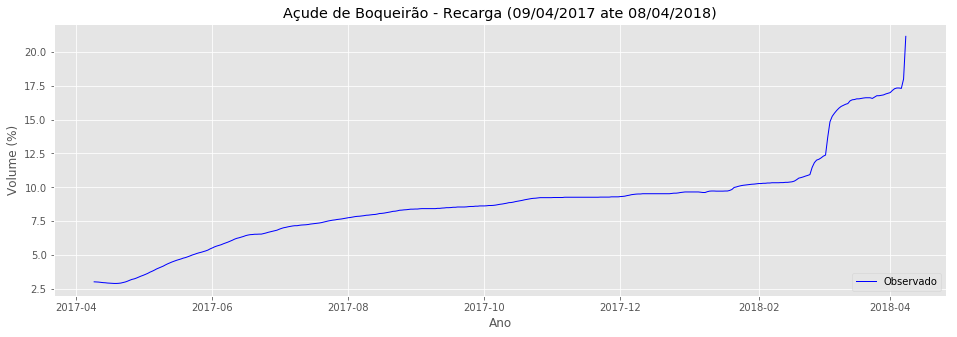

In [25]:
import matplotlib, matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,5))
matplotlib.style.use("ggplot")

plt.plot(df2["Volume (%)"], color='blue', linewidth=1)
# adcionando textos
plt.title("Açude de Boqueirão - Recarga (09/04/2017 ate 08/04/2018)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Observado"], loc="lower right")
plt.show()

In [26]:
# criar uma coluna com os dias
df3 = df2
numero_de_dias_observados = len(df3)
df3["dia"] = range(1,numero_de_dias_observados+1)
df3.head()

,Açude,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,,
2017-04-09,Epitácio Pessoa,3.03,12475341.58,-58974.26,1
2017-04-10,Epitácio Pessoa,3.02,12445854.45,-29487.13,2
2017-04-11,Epitácio Pessoa,3.01,12386880.19,-58974.26,3
2017-04-12,Epitácio Pessoa,2.99,12298418.80,-88461.39,4
2017-04-13,Epitácio Pessoa,2.97,12239444.54,-58974.26,5


In [27]:
print("numero_de_dias_observados = ",len(df3)) # numero de tuplas ou linhas ou medições

numero_de_dias_observados =  364


In [28]:
df3.tail()

,Açude,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,,
2018-04-04,Epitácio Pessoa,17.33,71332888.00,210499.20,360
2018-04-05,Epitácio Pessoa,17.33,71332888.00,0.00,361
2018-04-06,Epitácio Pessoa,17.30,71227638.40,-105249.60,362
2018-04-07,Epitácio Pessoa,17.99,74069377.60,2841739.20,363
2018-04-08,Epitácio Pessoa,21.14,87044871.44,12975493.84,364


## Preparar os dados para aplicar o modelo de regressao

In [32]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')
#X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
X = df3['dia'].values.reshape(-1, 1)
y = df3['Volume (%)']

print(X[:3])
print(y[:3])

[[1]
 [2]
 [3]]
Data do registro
2017-04-09    3.03
2017-04-10    3.02
2017-04-11    3.01
Name: Volume (%), dtype: float64


## Aplicar o modelo de Regressao

In [33]:
# Aplicar o modelo de Regressao
olm = lm.LinearRegression()
olm.fit(X, y)
olm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Métrica para avaliar o modelo
R² - coeficiente de determinação. <br />
É uma métrica que mede os o quanto dos futuros examplos são previstos corretamente. <br />
Varia entre 1 e -1. Quanto mais o R² se aproximar de 1 ou -1, melhor a previsão. <br />
Um R² próximo de 0, não reflete o modelo

In [35]:
from sklearn.metrics import r2_score

y_pred = olm.predict(df3['dia'].values.reshape(-1, 1))
# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.8186067663027004


## Plota os Dados Observados e Previstos

### preparando a saida para plotar

In [39]:
# a reta de regressao
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.028326711893337055 * x + 3.6302102443011517


reta de regressão
 y = 0.028326711893337055 * x + 3.6302102443011517


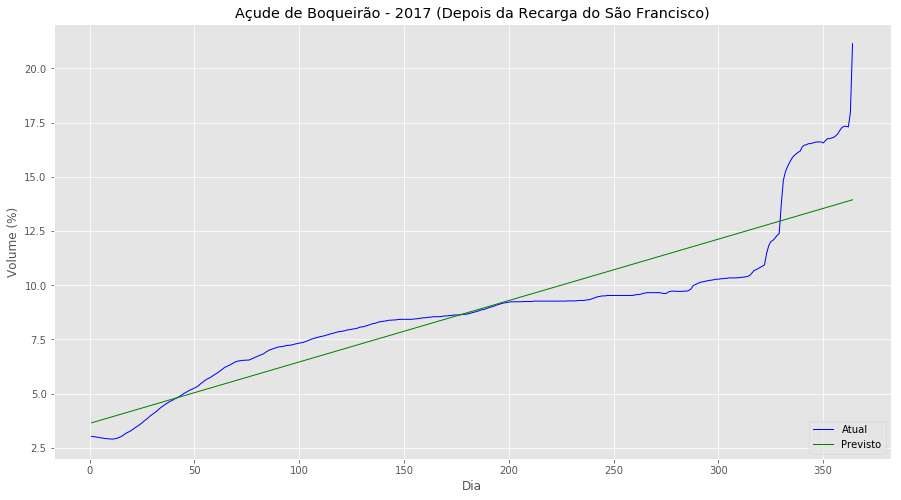

In [44]:
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,8))

# Plot both data sets
plt.plot(X, y, color='blue',
         linewidth=1)
plt.plot(X, olm.predict(X), color='green',
         linewidth=1)

# Add decorations
plt.title("Açude de Boqueirão - 2017 (Depois da Recarga do São Francisco)")
plt.xlabel("Dia")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto",], loc="lower right")
print('reta de regressão')
print(' y = {0} * x + {1}'.format(a, b))
plt.show()

In [45]:
list(olm.predict(X))[:3]

[3.6585369561944887, 3.6868636680878257, 3.7151903799811627]

In [46]:
import numpy as np

In [47]:
numero_de_dias_observados

364

In [48]:
dados3meses = np.array(numero_de_dias_observados + 90)
dados3meses

array(454)

In [49]:
olm.predict(dados3meses)[0]

16.490537443876175

In [50]:
# predicao para 1 ano
dados = np.array(numero_de_dias_observados + 365)
pred = olm.predict(dados)[0] 
print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

Volume Boqueirão depois de um ano =  24.28 %


In [51]:
# predicao para 2 anos
dados = np.array((numero_de_dias_observados+365)*2).reshape(1, -1)
pred = olm.predict(dados)[0]  

print ("Volume Boqueirão depois de dois anos = %6.2f %%" % (pred))

Volume Boqueirão depois de dois anos =  44.93 %


In [52]:
# predicao até verter água-sangrar
ano = 1
while (True):
    anopred = np.array([(numero_de_dias_observados + 365)*ano]).reshape(1, -1)
    #print(anopred/365, anopred, ano)
    pred = olm.predict(anopred)[0]  
    if pred >= 100:
        break
    print ("Volume Boqueirão depois de %d ano(s) -> %-5.2f%%" % (ano,pred))
    ano = ano +  1
print ("Volume Boqueirão depois de %d ano(s) -> %-5.2f%%" % (ano,pred))

Volume Boqueirão depois de 1 ano(s) -> 24.28%
Volume Boqueirão depois de 2 ano(s) -> 44.93%
Volume Boqueirão depois de 3 ano(s) -> 65.58%
Volume Boqueirão depois de 4 ano(s) -> 86.23%
Volume Boqueirão depois de 5 ano(s) -> 106.88%


### Com os dados de recarga do São Francisco e dados de chuva, representados pelo Volume diário, <br /> O Açude de Boqueirão encherá entre 4-5 anos (2022-2023)